<a href="https://colab.research.google.com/github/jeffersonramelo/An-lise_DCs/blob/main/analise_empresas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

            LC        LI        LS        LG        ET        CE       ICP  \
LC    1.000000  0.850000  0.983333  0.750000 -0.550000 -0.883333 -0.750000   
LI    0.850000  1.000000  0.883333  0.600000 -0.416667 -0.733333 -0.600000   
LS    0.983333  0.883333  1.000000  0.700000 -0.500000 -0.850000 -0.700000   
LG    0.750000  0.600000  0.700000  1.000000 -0.933333 -0.500000 -1.000000   
ET   -0.550000 -0.416667 -0.500000 -0.933333  1.000000  0.216667  0.933333   
CE   -0.883333 -0.733333 -0.850000 -0.500000  0.216667  1.000000  0.500000   
ICP  -0.750000 -0.600000 -0.700000 -1.000000  0.933333  0.500000  1.000000   
IRNC -0.966667 -0.816667 -0.933333 -0.800000  0.600000  0.883333  0.800000   
ROI  -0.733333 -0.666667 -0.816667 -0.416667  0.250000  0.600000  0.416667   
ROE   0.366667  0.433333  0.466667 -0.066667  0.116667 -0.283333  0.066667   
CGLC  1.000000  0.850000  0.983333  0.750000 -0.550000 -0.883333 -0.750000   
NCGC  0.750000  0.566667  0.733333  0.683333 -0.666667 -0.600000

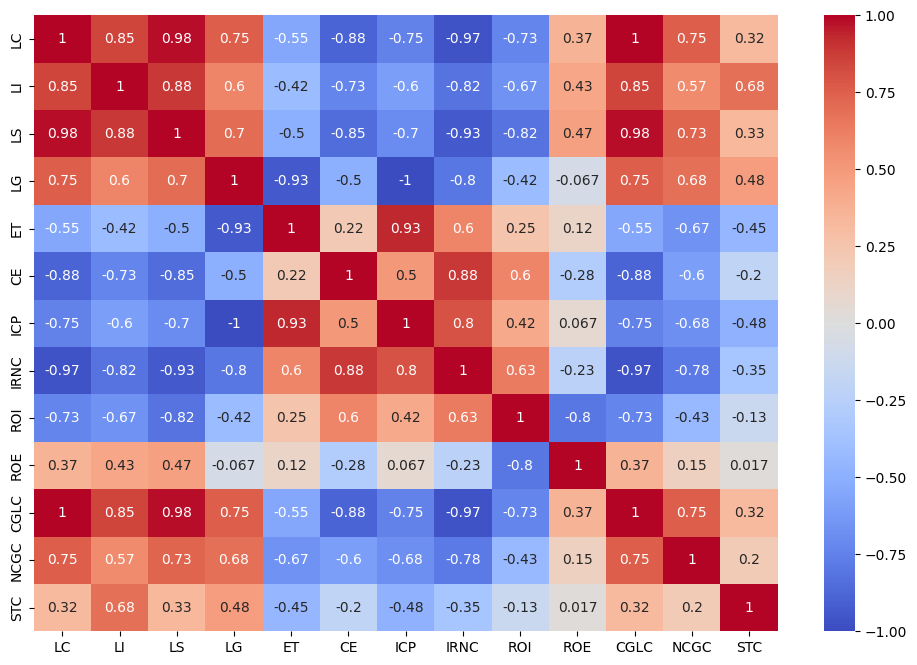

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo XLSX
file_path = '/content/Dados para Trabalho2.xlsx'
df = pd.read_excel(file_path)

# Filtrar apenas as linhas onde a coluna "Nome" contém "Ambev S/A"
df_filtered = df[df['Nome'] == 'Ambev S/A']

# Selecionar apenas as colunas mencionadas
columns_of_interest = ['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'ROE', 'CGLC', 'NCGC', 'STC']
df_selected = df_filtered[columns_of_interest]

# Converter as colunas para numérico, forçando erros a serem NaN
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Calcular a matriz de correlação de Spearman
corr_matrix = df_selected.corr(method='spearman')

# Exibir a matriz de correlação
print(corr_matrix)

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()


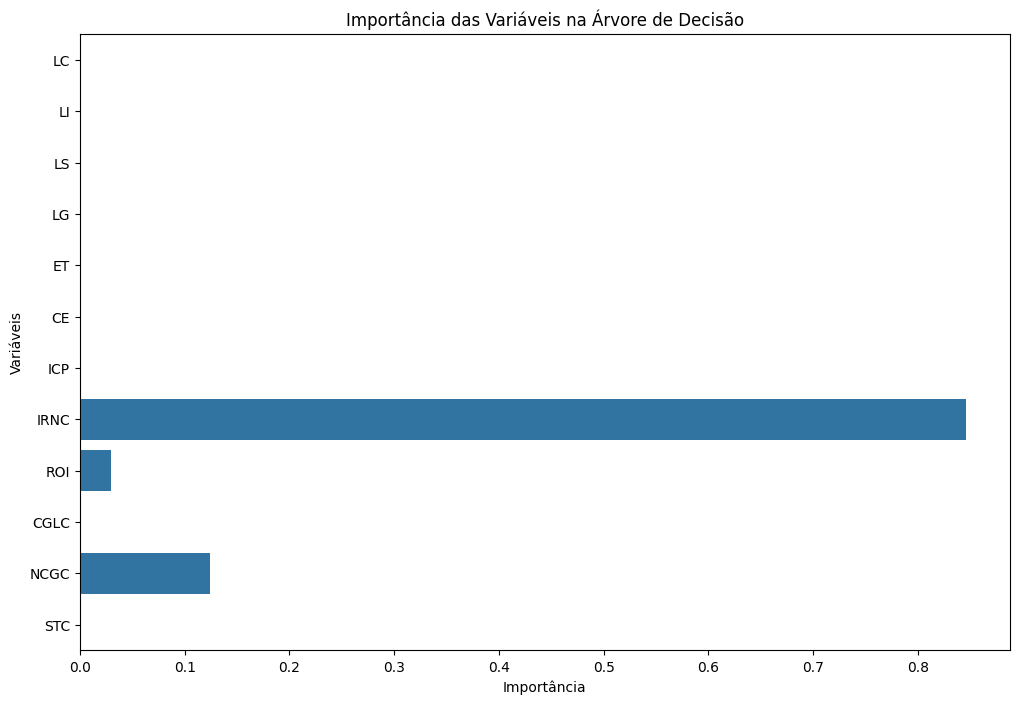

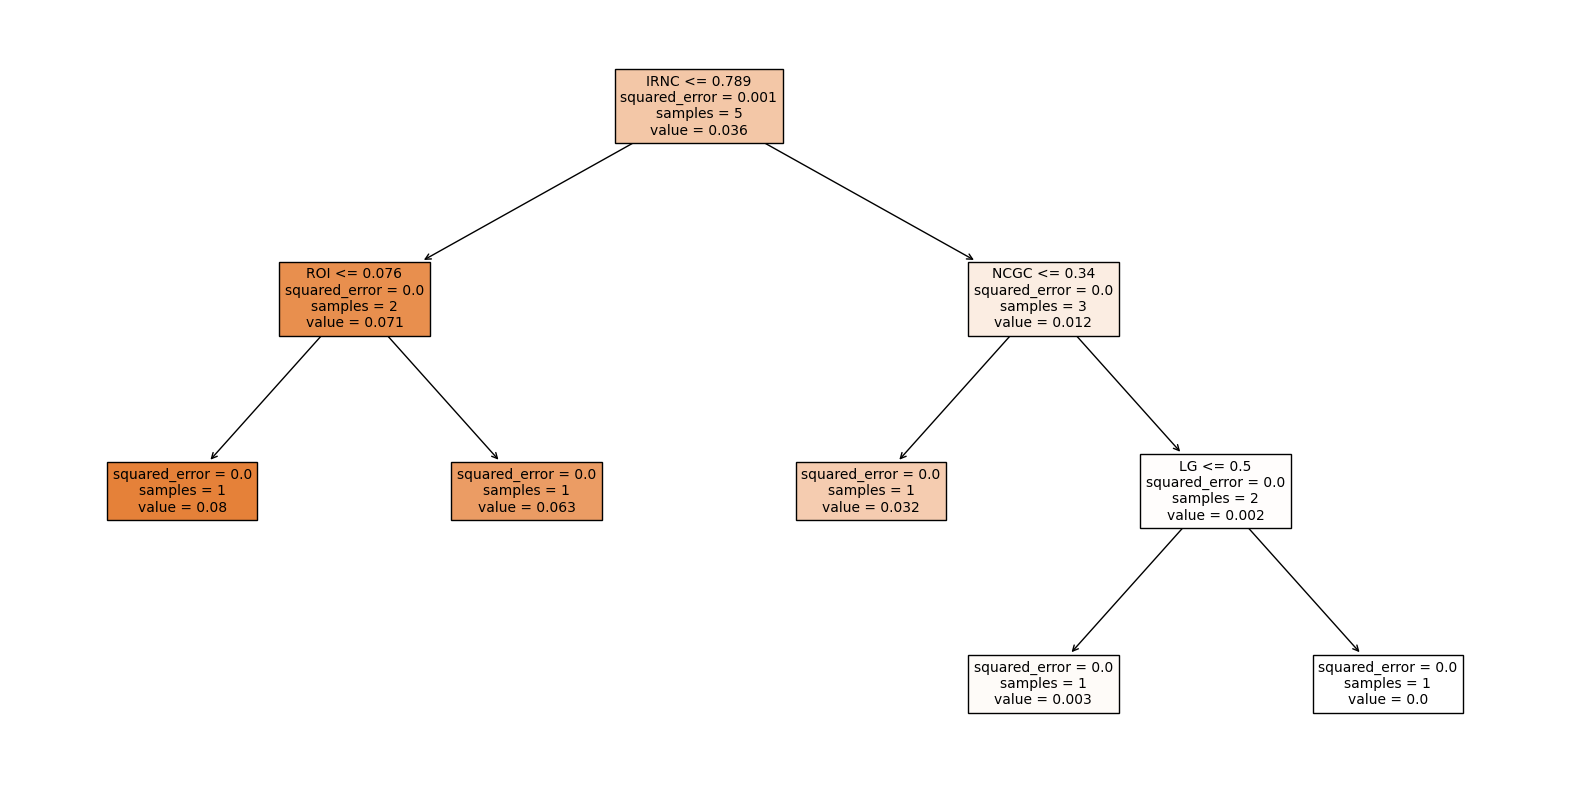

In [16]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns

# Carregar o arquivo XLSX
file_path = '/content/Dados para Trabalho2.xlsx'
df = pd.read_excel(file_path)

# Filtrar apenas as linhas onde a coluna "Nome" contém "Ambev S/A"
df_filtered = df[df['Nome'] == 'Vale']

# Selecionar apenas as colunas mencionadas
columns_of_interest = ['LC', 'LI', 'LS', 'LG', 'ET', 'CE', 'ICP', 'IRNC', 'ROI', 'ROE', 'CGLC', 'NCGC', 'STC']
df_selected = df_filtered[columns_of_interest]

# Converter as colunas para numérico, forçando erros a serem NaN
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')

# Tratar valores ausentes (opção: preencher com a média)
df_selected = df_selected.fillna(df_selected.mean())

# Dividir os dados em conjuntos de treino e teste
X = df_selected.drop(columns=['ROE'])
y = df_selected['ROE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar a árvore de decisão
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Visualizar a importância das variáveis
feature_importance = model.feature_importances_
features = X.columns

# Plotar a importância das variáveis
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=features)
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.title('Importância das Variáveis na Árvore de Decisão')
plt.show()

# Visualizar a árvore de decisão
plt.figure(figsize=(20, 10))
tree.plot_tree(model, feature_names=features, filled=True, fontsize=10)
plt.show()
